# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

#### Get the handcrafted features


In [9]:
#### importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import confusion_matrix

In [2]:


# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [3]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1264,0.353527,-0.036623,-0.093492,-0.296752,0.187732,-0.387994,-0.36065,0.218166,-0.395419,-0.192086,...,-0.727454,0.2369,-0.712868,-0.559127,-0.787981,0.242679,-0.007043,6,1,WALKING


In [4]:
train.shape

(7352, 564)

## Obtain the  test data 

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2560,0.303065,0.002404,-0.084307,-0.012065,0.391696,-0.224547,-0.098529,0.468728,-0.214721,0.177449,...,0.026147,-0.111198,-0.94779,-0.088208,-0.455923,0.472754,-0.009837,20,2,WALKING_UPSTAIRS


In [6]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [9]:


sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

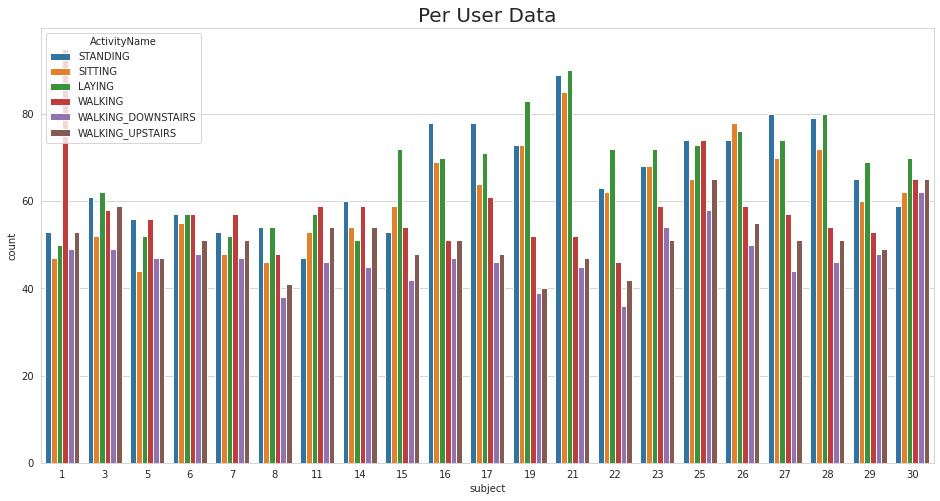

In [10]:
plt.figure(figsize=(16,8))
plt.title('Per User Data', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

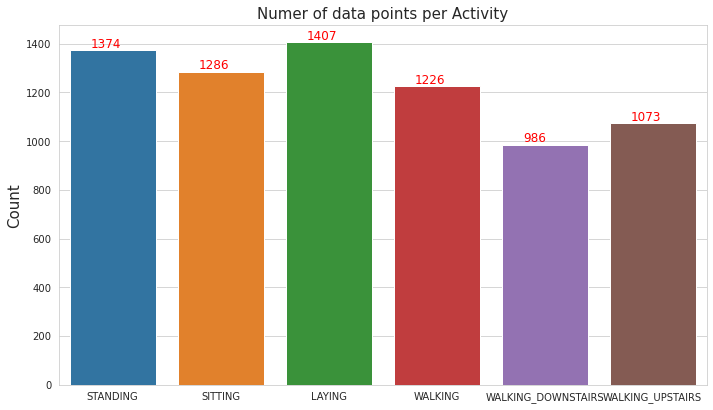

In [11]:
# https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
# https://jovian.ai/rajkap/project
fig = plt.figure(figsize = (9, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Numer of data points per Activity", fontsize = 15)
sns.countplot(x = "ActivityName", data = train)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 12, color = "red")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.show()

### Observation
> Our data is well balanced.

## 4. Changing feature names 

In [12]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [13]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

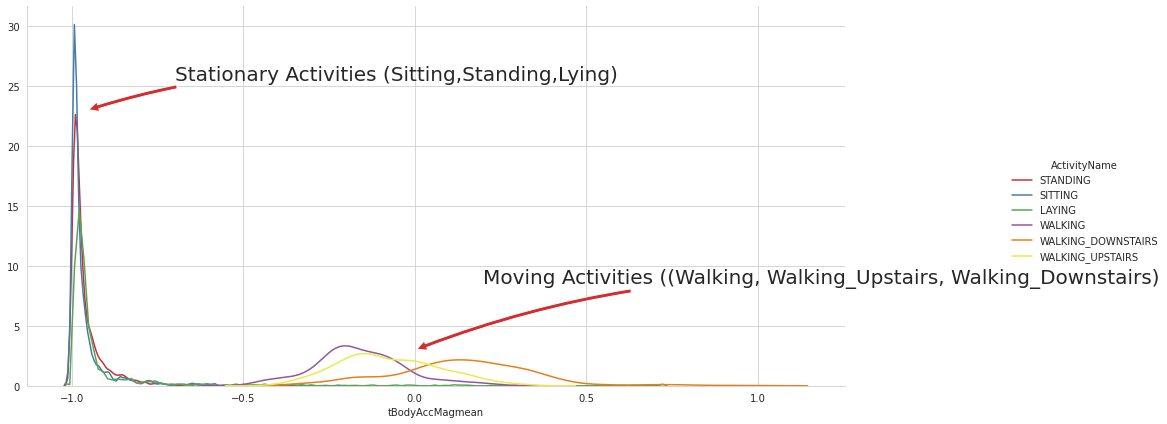

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities (Sitting,Standing,Lying)", xy=(-0.956,23), xytext=(-0.7, 26), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities ((Walking, Walking_Upstairs, Walking_Downstairs)", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

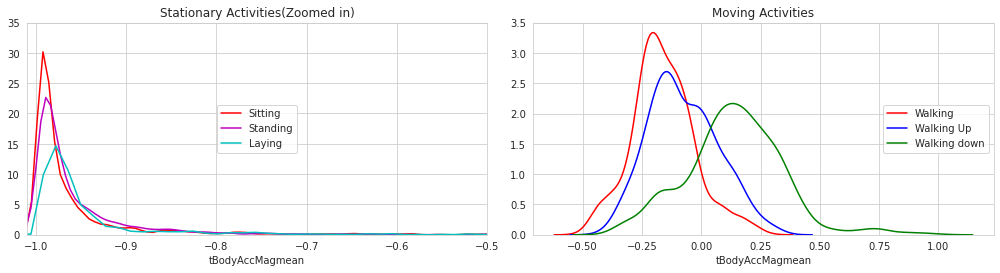

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

#### Observations :
* As we can see that the moving activities are well separated  than the static activities.tbodyAccMagmean is the mean of the magnitude of body acceleration which is well separated for the dynamic nd static activities.

### 3. Magnitude of an acceleration can saperate it well

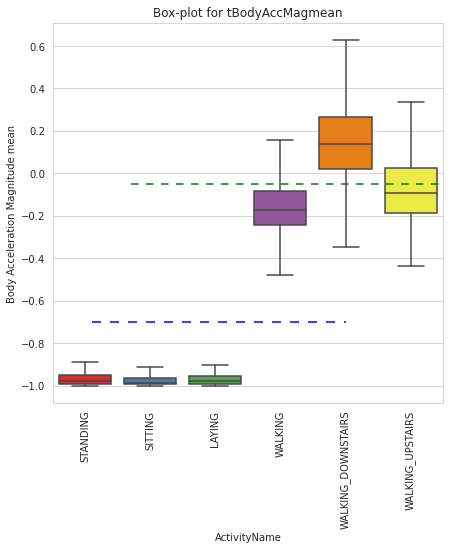

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Body Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.75,dashes=(6,6), c='b')
plt.axhline(y=-0.05, xmin=0.2, dashes=(5,5), c='g')
plt.title('Box-plot for tBodyAccMagmean')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants is important 

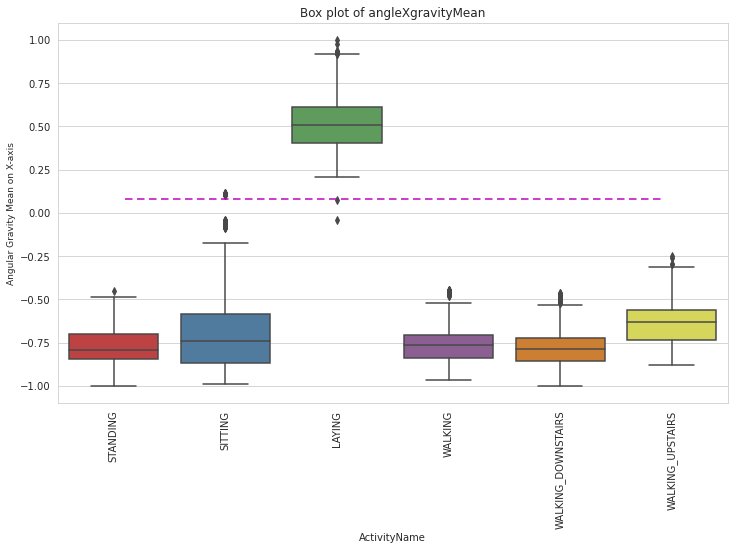

In [17]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title("Box plot of angleXgravityMean", fontsize = 12)
plt.ylabel("Angular Gravity Mean on X-axis", fontsize = 9)
plt.xticks(rotation = 90)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

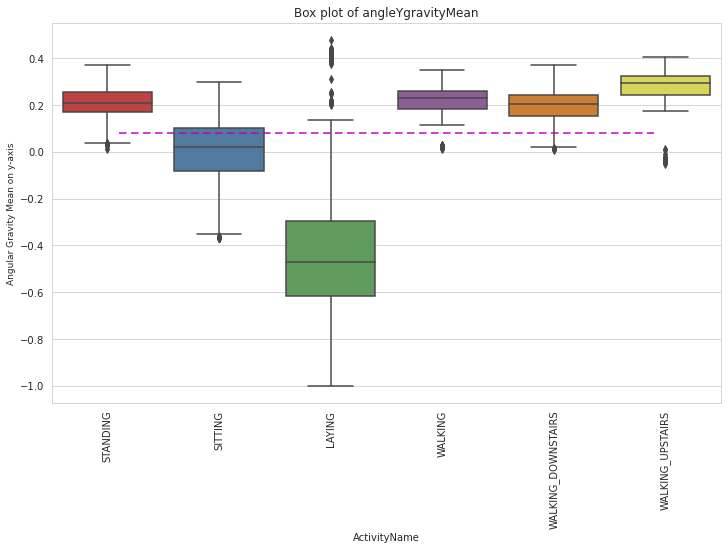

In [18]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='ActivityName', y='angleYgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title("Box plot of angleYgravityMean", fontsize = 12)
plt.ylabel("Angular Gravity Mean on y-axis", fontsize = 9)
plt.xticks(rotation = 90)
plt.show()

# Apply t-sne on the data 

In [20]:
# performs t-sne with different perplexity values and their repective plots..

def show_tsne(perplexities,X_data, y_data, n_iter=1000, img_name_prefix='t-sne'):
    
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        lower_dim_x = TSNE(n_components=2, perplexity=perplexity,verbose=2).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':lower_dim_x[:,0], 'y':lower_dim_x[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 3.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.061s
[t-SNE] Iteration 50: error = 124.7481995, gradient norm = 0.0241895 (50 iterations in 15.548s)
[t-SNE] Iteration 100: error = 107.1610794, gradient norm = 0.0287191 (50 iterations in

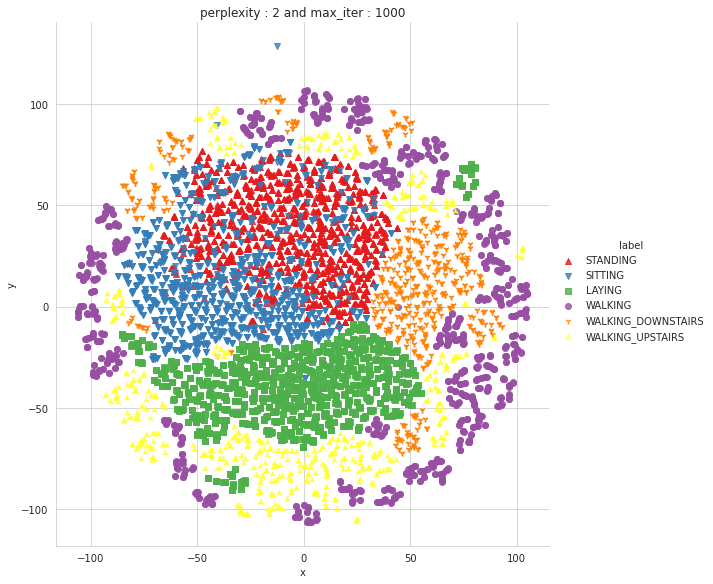

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.027s...
[t-SNE] Computed neighbors for 7352 samples in 3.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.110s
[t-SNE] Iteration 50: error = 113.8799591, gradient norm = 0.0222652 (50 iterations in 6.202s)
[t-SNE] Iteration 100: error = 98.0514526, gradient norm = 0.0167063 (50 iteration

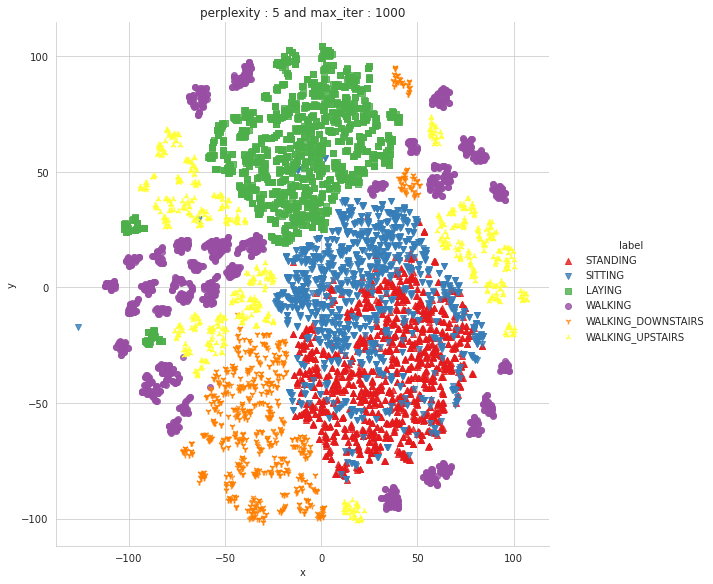

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 3.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.228s
[t-SNE] Iteration 50: error = 105.4448395, gradient norm = 0.0251430 (50 iterations in 7.548s)
[t-SNE] Iteration 100: error = 90.6870880, gradient norm = 0.0092564 (50 iteratio

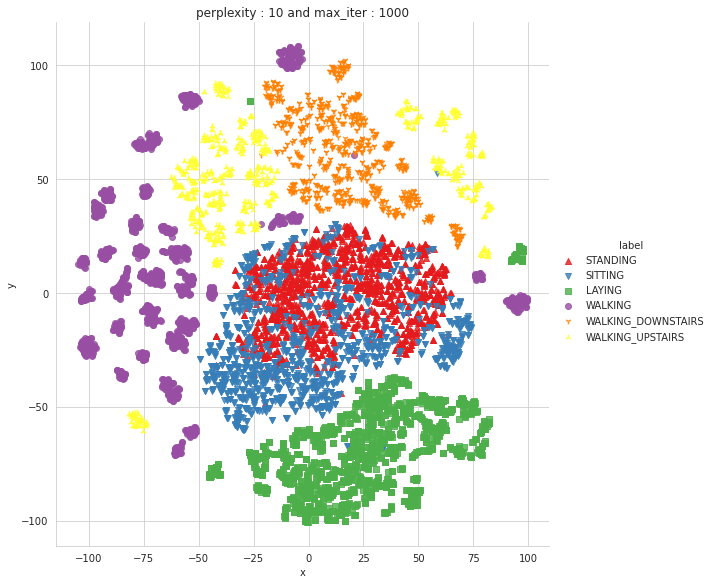

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.672s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.419s
[t-SNE] Iteration 50: error = 97.5241547, gradient norm = 0.0189147 (50 iterations in 5.782s)
[t-SNE] Iteration 100: error = 84.0375824, gradient norm = 0.0068614 (50 iteration

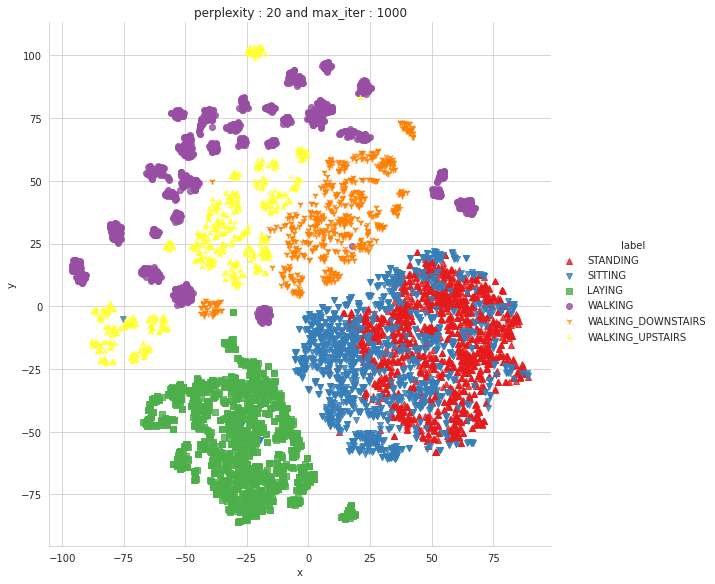

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 3.365s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 1.011s
[t-SNE] Iteration 50: error = 86.4537201, gradient norm = 0.0218618 (50 iterations in 7.428s)
[t-SNE] Iteration 100: error = 75.5895767, gradient norm = 0.0042839 (50 iteratio

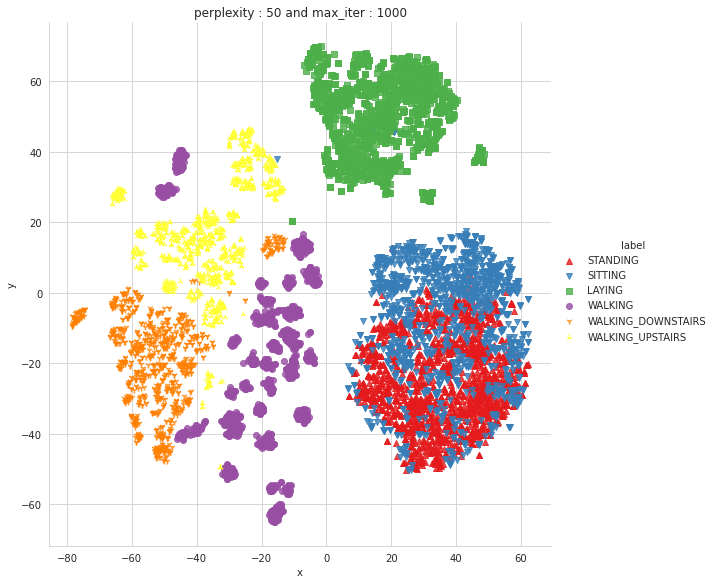

Done


In [21]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perplexities =[2,5,10,20,50]

for index,perplexity in enumerate(perplexities):
    show_tsne(perplexity,X_data = X_pre_tsne,y_data=y_pre_tsne)

#### Observations :
* We can see that as we increase our perplexities all the lables except standing and sitting positions are separted well.
* Standing and sitting position being a dynamic label overlaps with one another despite perplexity alters.

## 2. Building Statistical models and training with the domain engineered features

In [22]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train['ActivityName']
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test['ActivityName']
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [26]:
def plot_confusion_matrix(y_test,y_pred):
    conf_mat = confusion_matrix_(y_test, y_pred)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    A =(((conf_mat.T)/(conf_mat.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(conf_mat/conf_mat.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(conf_mat, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.xticks(rotation = 90)
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.xticks(rotation = 90)   
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlOrBr", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.xticks(rotation = 90)
    plt.show()
    

In [24]:
### craete a dataframe to store model scores
df = pd.DataFrame(columns=['Model_name','Accuracy%'])

def save_performances(model_name,accuracy):
    global df 
    df = df.append(pd.DataFrame([[model_name,accuracy]],columns=['Model_name','Accuracy%']))
    #df = df.reset_index(drop=True,inplace=True)

In [25]:
def run_model(model,train,ytrain,test,ytest,model_name):

    ##train data
    train_start = datetime.now()
    model.fit(train,ytrain)
    print('Time taken to train the model: ',datetime.now()- train_start)
    print('Done \n \n')
    
    ## print best params from grid search
    print('*'*20)
    print('Best-Params(Grid_search):  ')
    print('*'*20)
    print('params of best estimator: ',model.best_params_)
    
    print('*'*50)
    print('Best-Score(Grid_search):  ')
    print('*'*50)
    print('Score of best estimator: ',model.best_score_)
    print('/n/n')
    print('Training model: ',model)
    ## fit model with best params
    model = model.best_estimator_.fit(train,ytrain)
    ##predict data
    y_pred_tr = model.predict(train)
    y_pred_te = model.predict(test)
    train_acc = metrics.accuracy_score(y_true=ytrain, y_pred=y_pred_tr) 
    test_acc = metrics.accuracy_score(y_true=ytest, y_pred=y_pred_te)
    
    ## calculate train accuracy
    print('*'*50)
    print('Accuracy:  ')
    print('*'*50)
    print('Train Accuracy:',train_acc,'Test Accuracy',test_acc)
    print('\n\n')
    ##print confusion matrix
    print('*'*50)
    print('Confusion Matrix :test')
    print('*'*50)
    plot_confusion_matrix(ytest,y_pred_te)
    ##store in df
    save_performances(model_name,test_acc)

### 2.1. Logistic Regression with Grid Search

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken to train the model:  0:00:56.821896
Done 
 

********************
Best-Params(Grid_search):  
********************
params of best estimator:  {'C': 30, 'penalty': 'l2'}
**************************************************
Best-Score(Grid_search):  
**************************************************
Score of best estimator:  0.9449151116995146
/n/n
Training model:  GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='ovr'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             verbose=1)
**************************************************
Accuracy:  
**************************************************
Train Accuracy: 0.9944232861806311 Test Accuracy 0.9619952494061758



**************************************************
Confusion Matrix :test
**************************************************
-------------------- Confusion matrix ---

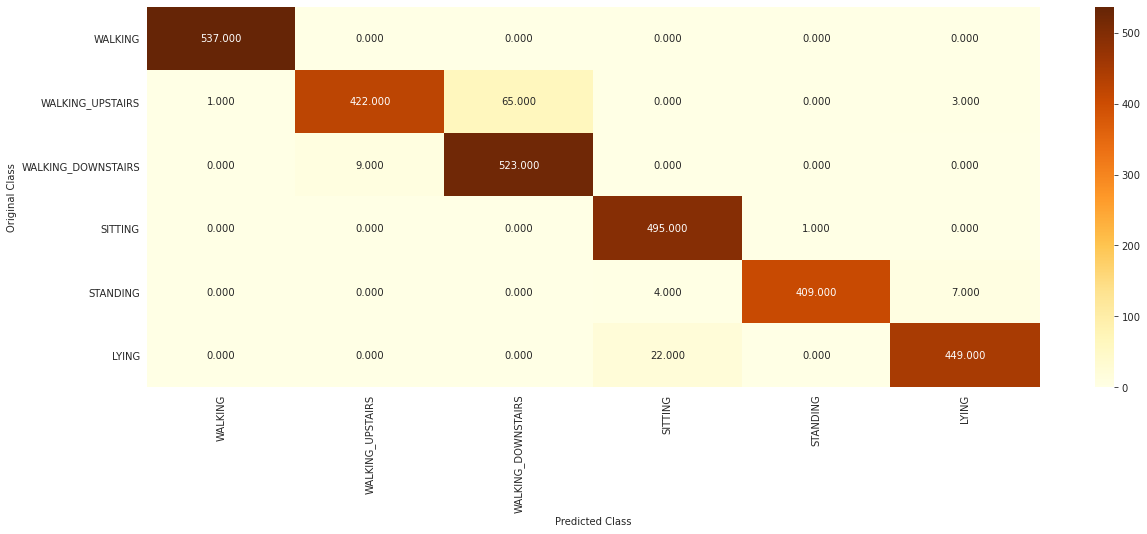

-------------------- Precision matrix (Columm Sum=1) --------------------


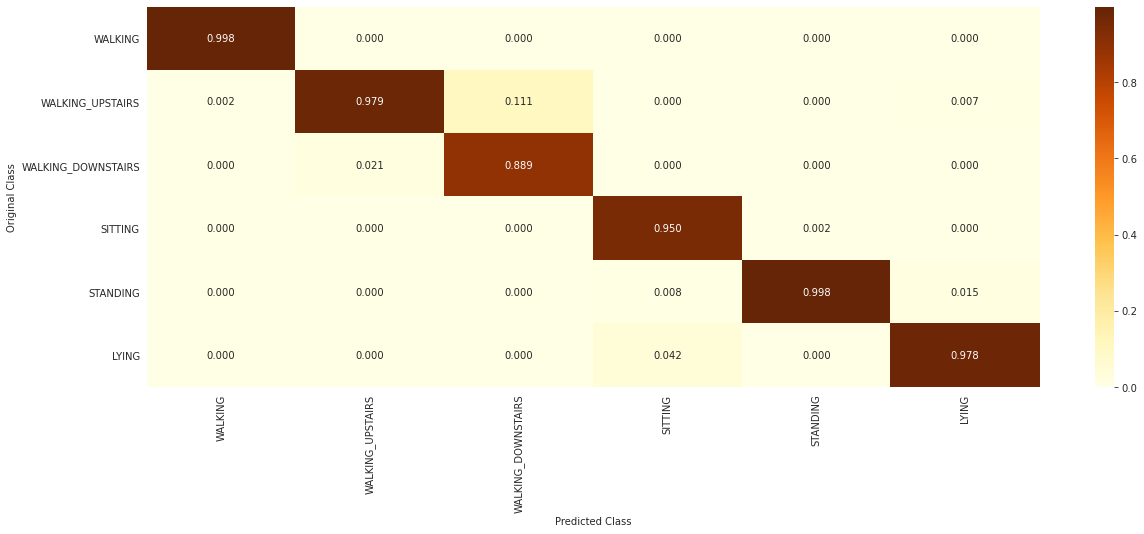

-------------------- Recall matrix (Row sum=1) --------------------


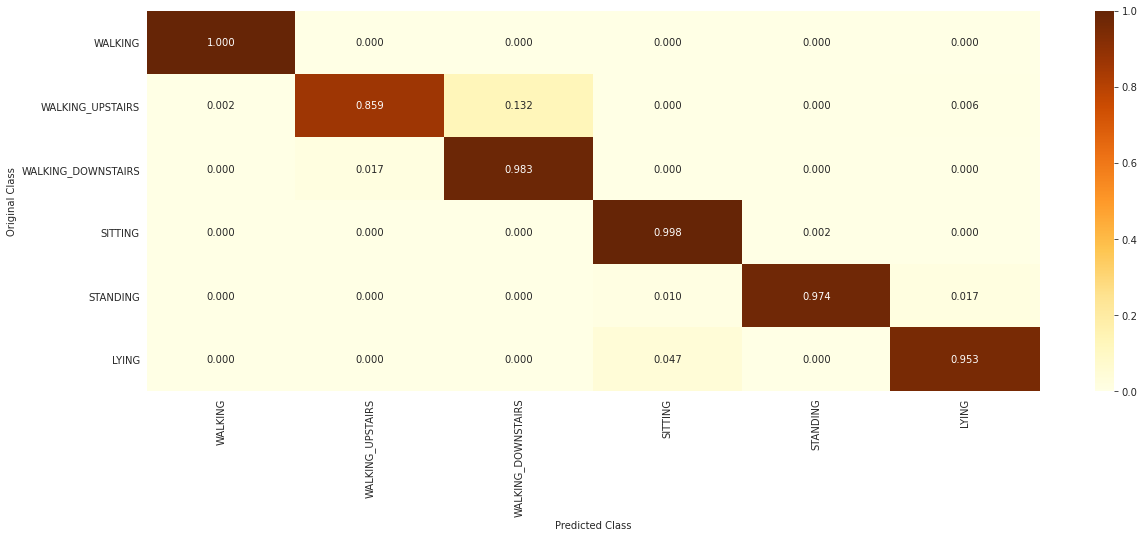

In [27]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(multi_class = "ovr")
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  run_model(log_reg_grid, X_train, y_train, X_test, y_test,'LogisticRegression')

## 2.2 Linear SVC with GridSearch

In [28]:
from sklearn.svm import LinearSVC

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Time taken to train the model:  0:01:05.836804
Done 
 

********************
Best-Params(Grid_search):  
********************
params of best estimator:  {'C': 0.5}
**************************************************
Best-Score(Grid_search):  
**************************************************
Score of best estimator:  0.9423363254207189
/n/n
Training model:  GridSearchCV(estimator=LinearSVC(tol=5e-05), n_jobs=-1,
             param_grid={'C': [0.125, 0.5, 1, 2, 8, 16]}, verbose=1)
**************************************************
Accuracy:  
**************************************************
Train Accuracy: 0.9944232861806311 Test Accuracy 0.9667458432304038



**************************************************
Confusion Matrix :test
**************************************************
-------------------- Confusion matrix --------------------


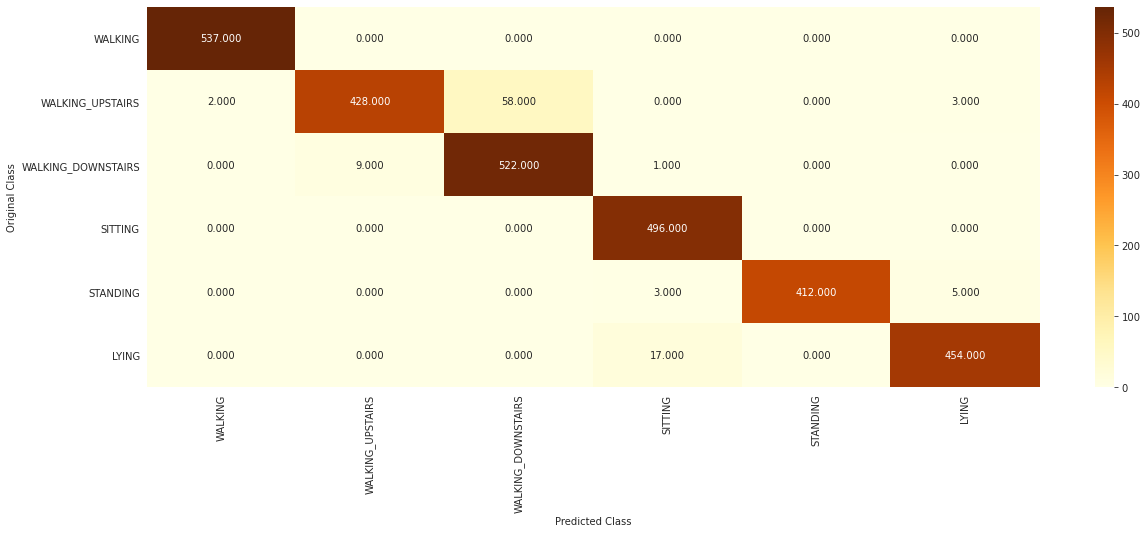

-------------------- Precision matrix (Columm Sum=1) --------------------


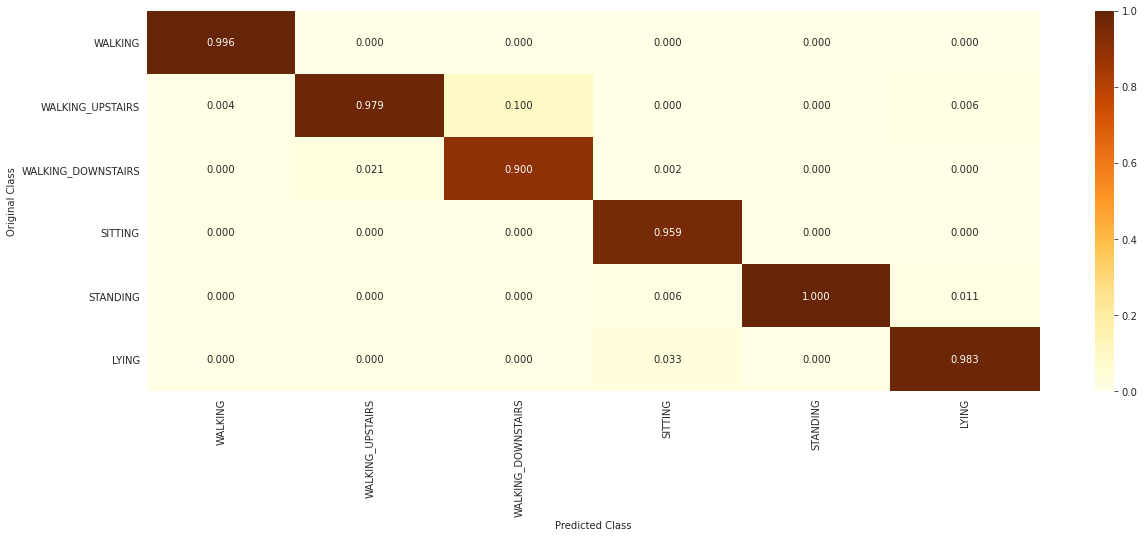

-------------------- Recall matrix (Row sum=1) --------------------


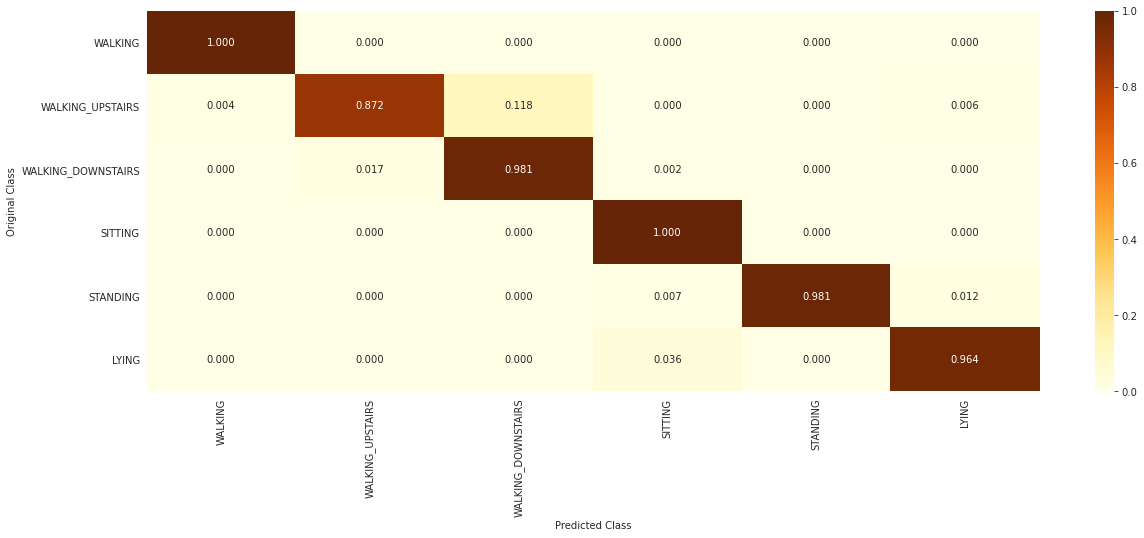

In [29]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = run_model(lr_svc_grid, X_train, y_train, X_test, y_test,'Linear SVC')

## 2.3.  Kernel SVM with GridSearch

Time taken to train the model:  0:08:16.665605
Done 
 

********************
Best-Params(Grid_search):  
********************
params of best estimator:  {'C': 16, 'gamma': 0.0078125}
**************************************************
Best-Score(Grid_search):  
**************************************************
Score of best estimator:  0.9447834551903698
/n/n
Training model:  GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2, 8, 16], 'gamma': [0.0078125, 0.125, 2]})
**************************************************
Accuracy:  
**************************************************
Train Accuracy: 0.9964635473340587 Test Accuracy 0.9626739056667798



**************************************************
Confusion Matrix :test
**************************************************
-------------------- Confusion matrix --------------------


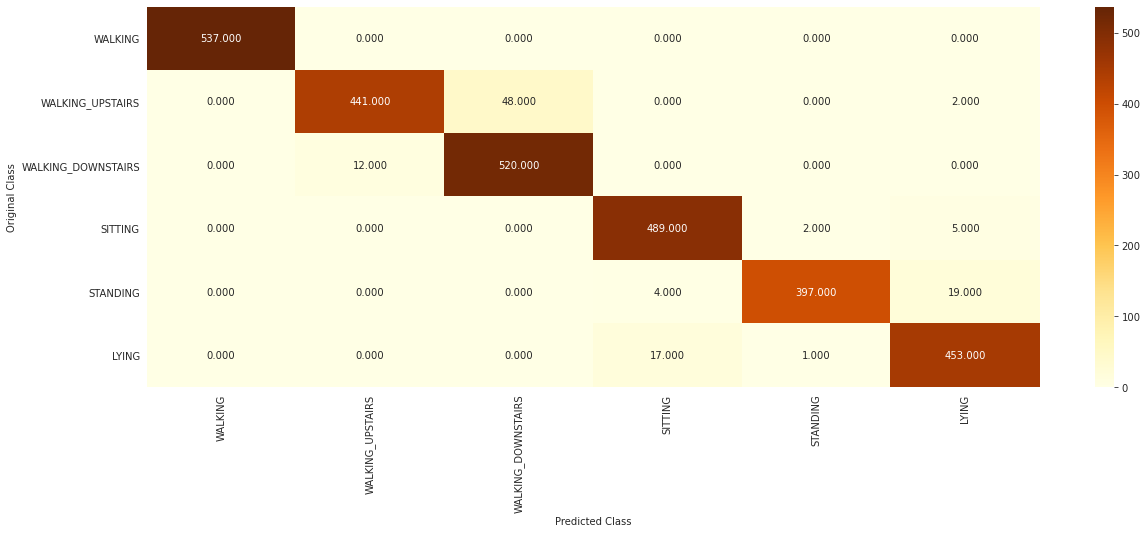

-------------------- Precision matrix (Columm Sum=1) --------------------


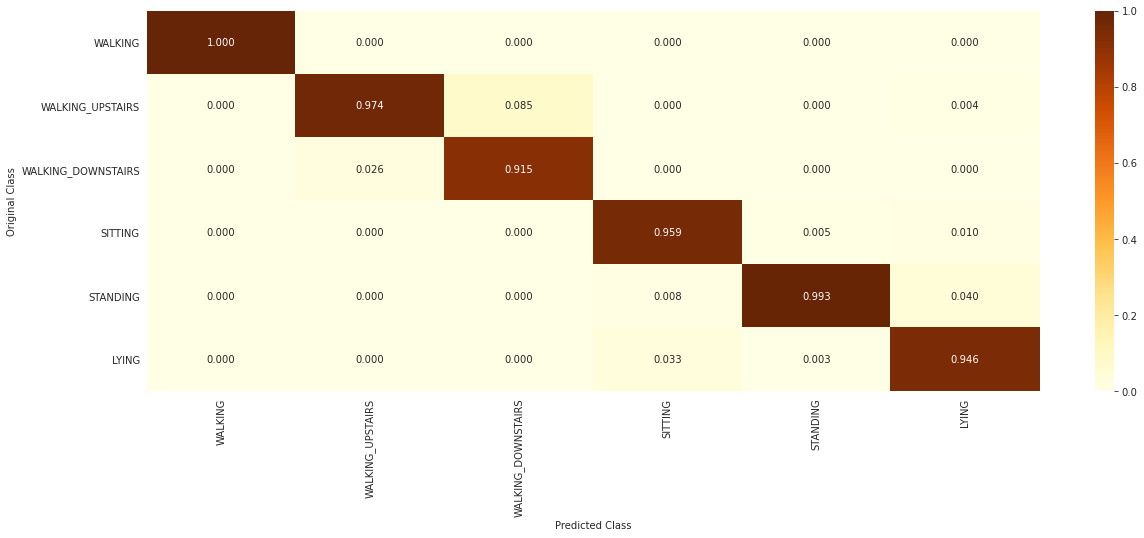

-------------------- Recall matrix (Row sum=1) --------------------


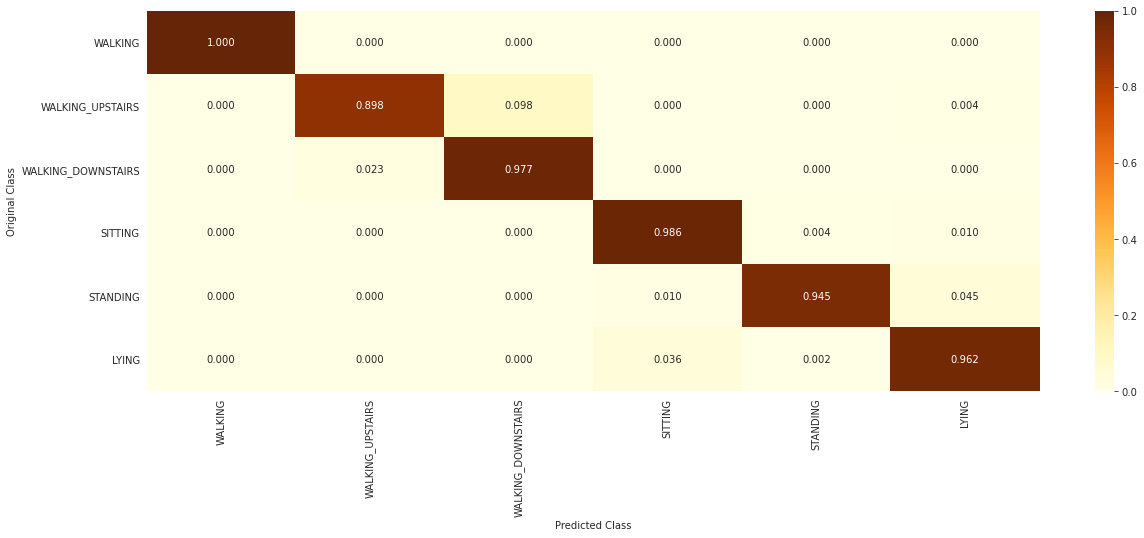

In [30]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = run_model(rbf_svm_grid, X_train, y_train, X_test, y_test, 'Kernel SVM')

## 2.4. Decision Trees with GridSearchCV

Time taken to train the model:  0:00:19.908109
Done 
 

********************
Best-Params(Grid_search):  
********************
params of best estimator:  {'max_depth': 5}
**************************************************
Best-Score(Grid_search):  
**************************************************
Score of best estimator:  0.8514733371254689
/n/n
Training model:  GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3, 5, 7, 9])})
**************************************************
Accuracy:  
**************************************************
Train Accuracy: 0.920429815016322 Test Accuracy 0.839497794367153



**************************************************
Confusion Matrix :test
**************************************************
-------------------- Confusion matrix --------------------


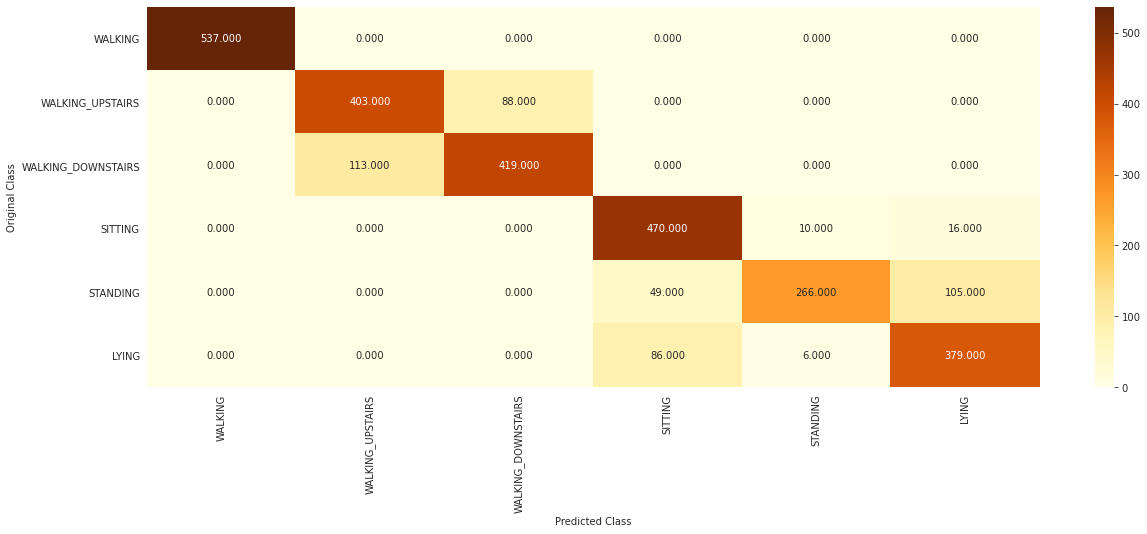

-------------------- Precision matrix (Columm Sum=1) --------------------


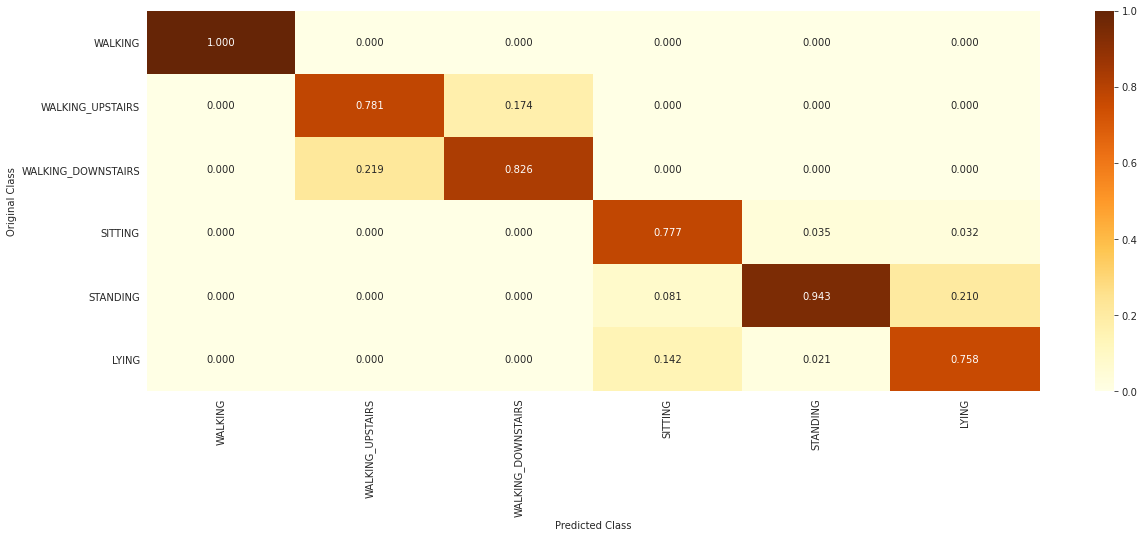

-------------------- Recall matrix (Row sum=1) --------------------


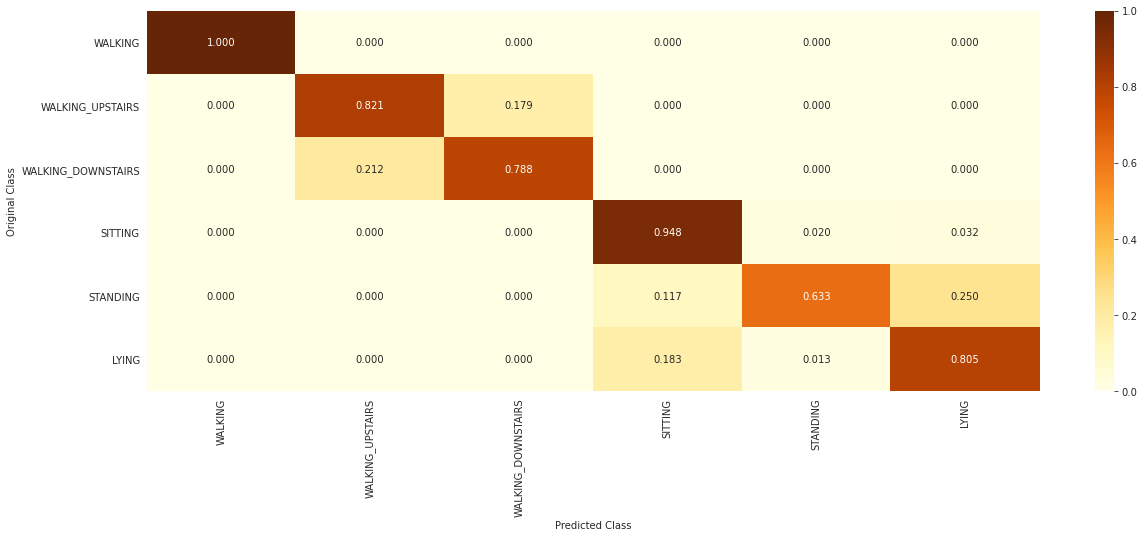

In [31]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = run_model(dt_grid, X_train, y_train, X_test, y_test, 'DecisionTrees')

## 2.5. Random Forest Classifier with GridSearch

Time taken to train the model:  0:10:44.490748
Done 
 

********************
Best-Params(Grid_search):  
********************
params of best estimator:  {'max_depth': 13, 'n_estimators': 70}
**************************************************
Best-Score(Grid_search):  
**************************************************
Score of best estimator:  0.9212499248509737
/n/n
Training model:  GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])})
**************************************************
Accuracy:  
**************************************************
Train Accuracy: 0.999183895538629 Test Accuracy 0.9233118425517476



**************************************************
Confusion Matrix :test
**************************************************
-------------------- Confusion matrix --------------------


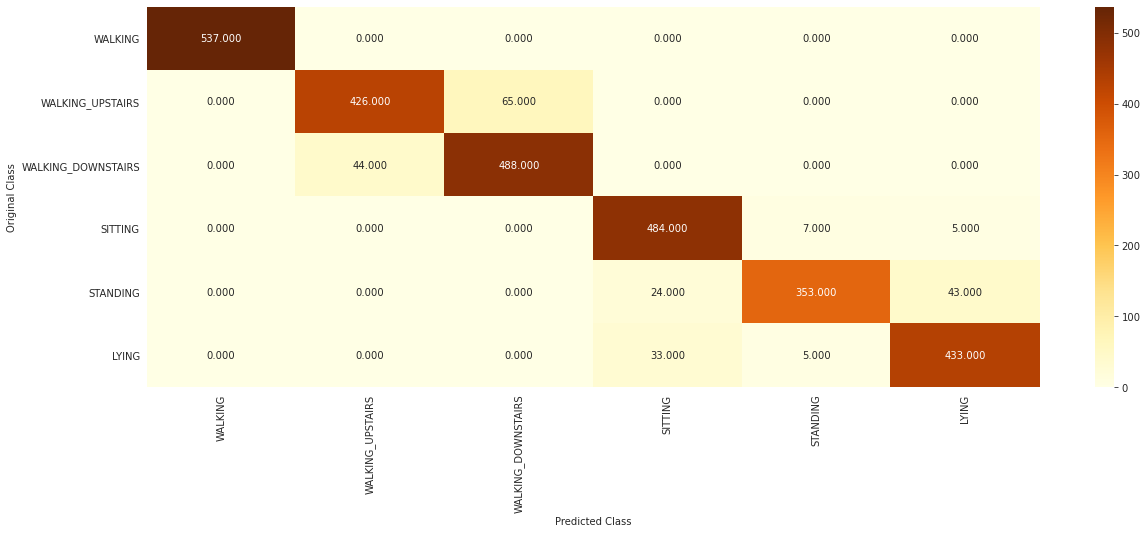

-------------------- Precision matrix (Columm Sum=1) --------------------


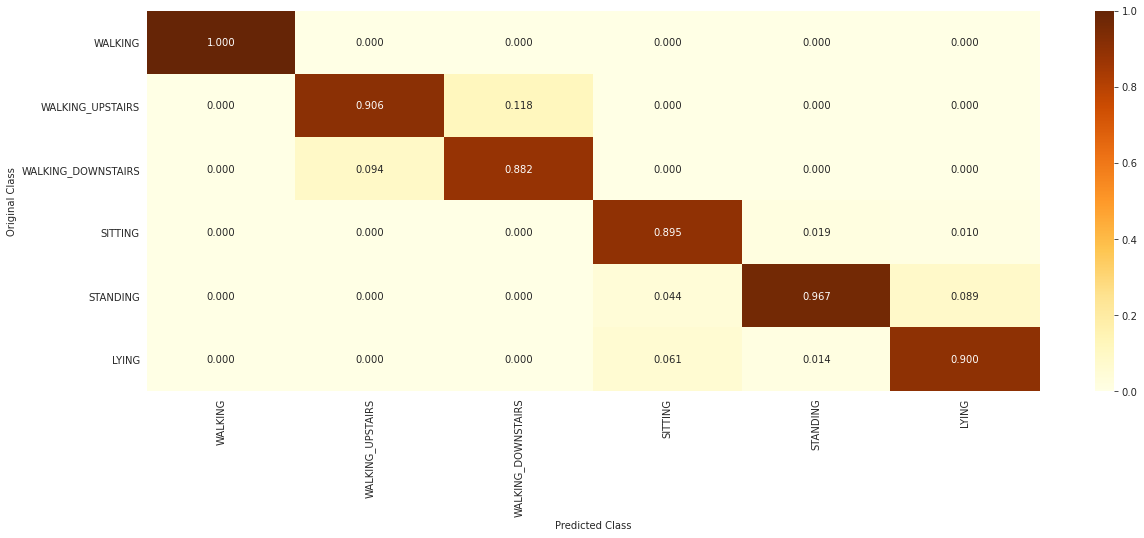

-------------------- Recall matrix (Row sum=1) --------------------


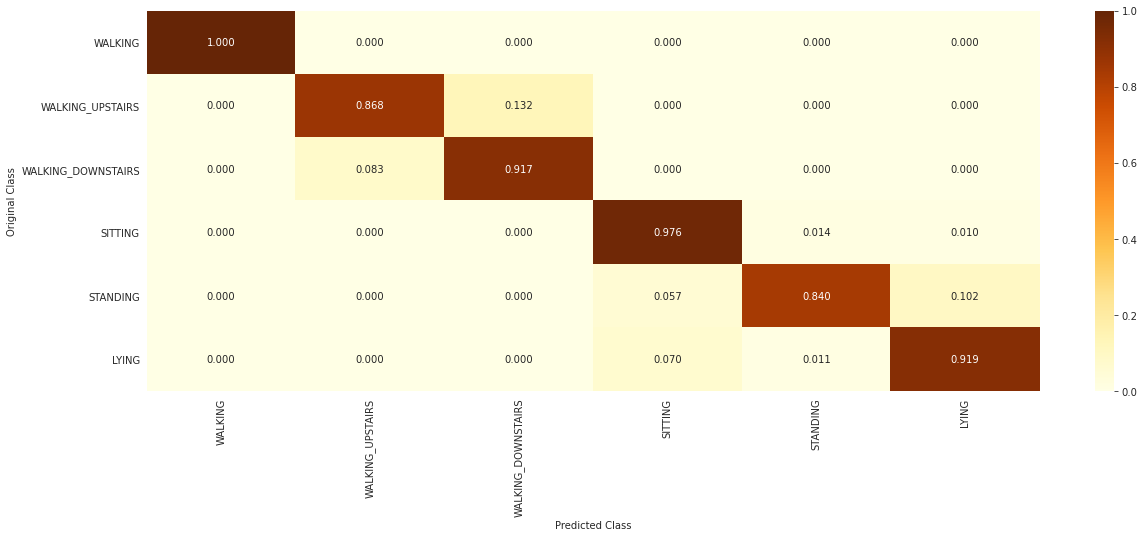

In [32]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = run_model(rfc_grid, X_train, y_train, X_test, y_test,'RandomForest')

## 2.6.  Gradient Boosted Decision Trees With GridSearch

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=1, n_estimators=50................................
[CV 1/5; 1/4] END ..............max_depth=1, n_estimators=50; total time= 1.5min
[CV 2/5; 1/4] START max_depth=1, n_estimators=50................................
[CV 2/5; 1/4] END ..............max_depth=1, n_estimators=50; total time= 1.5min
[CV 3/5; 1/4] START max_depth=1, n_estimators=50................................
[CV 3/5; 1/4] END ..............max_depth=1, n_estimators=50; total time= 1.6min
[CV 4/5; 1/4] START max_depth=1, n_estimators=50................................
[CV 4/5; 1/4] END ..............max_depth=1, n_estimators=50; total time= 1.6min
[CV 5/5; 1/4] START max_depth=1, n_estimators=50................................
[CV 5/5; 1/4] END ..............max_depth=1, n_estimators=50; total time= 1.8min
[CV 1/5; 2/4] START max_depth=1, n_estimators=100...............................
[CV 1/5; 2/4] END .............max_depth=1, n_est

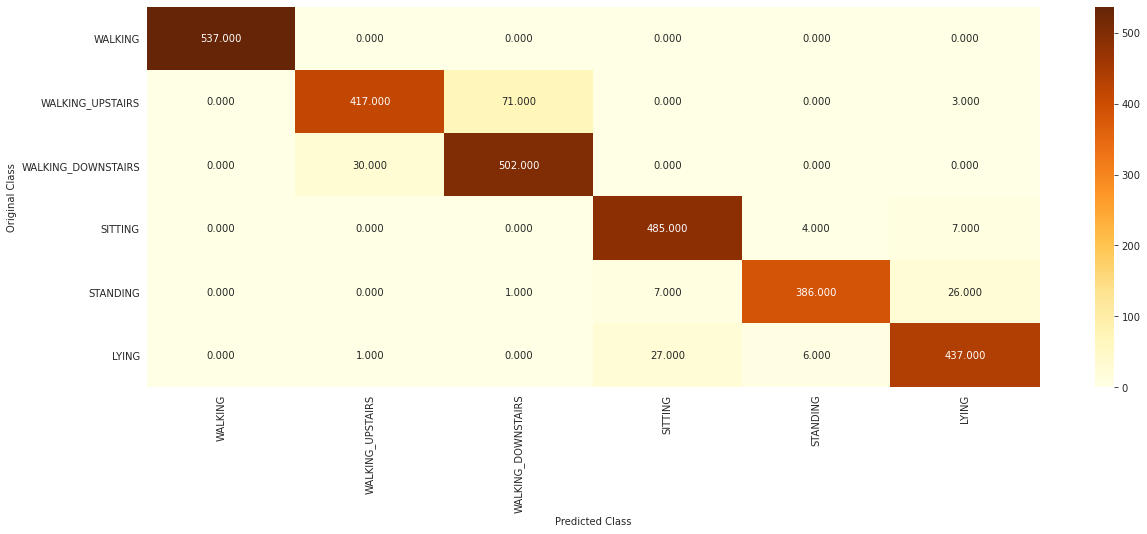

-------------------- Precision matrix (Columm Sum=1) --------------------


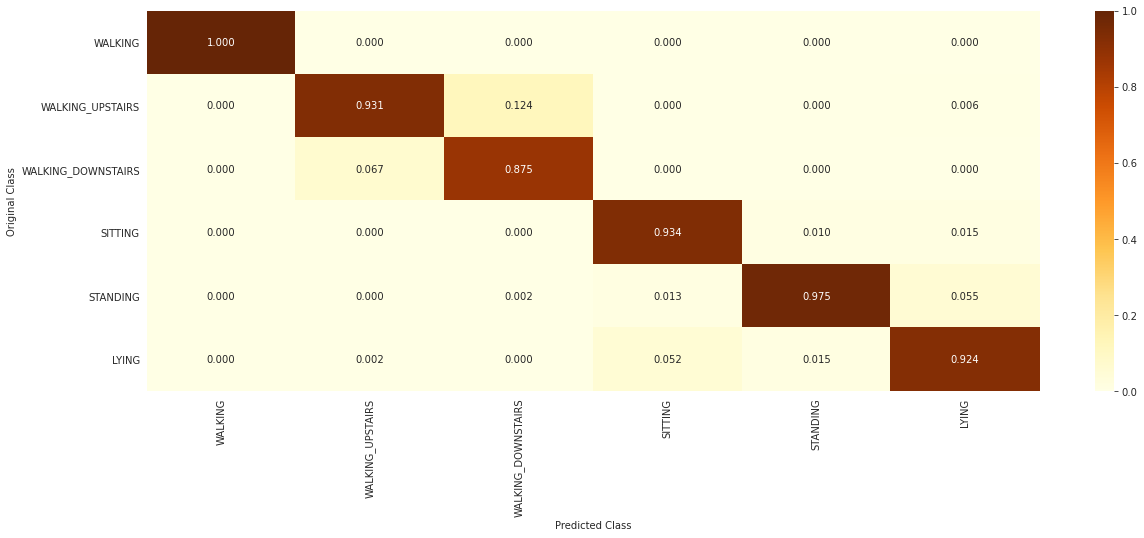

-------------------- Recall matrix (Row sum=1) --------------------


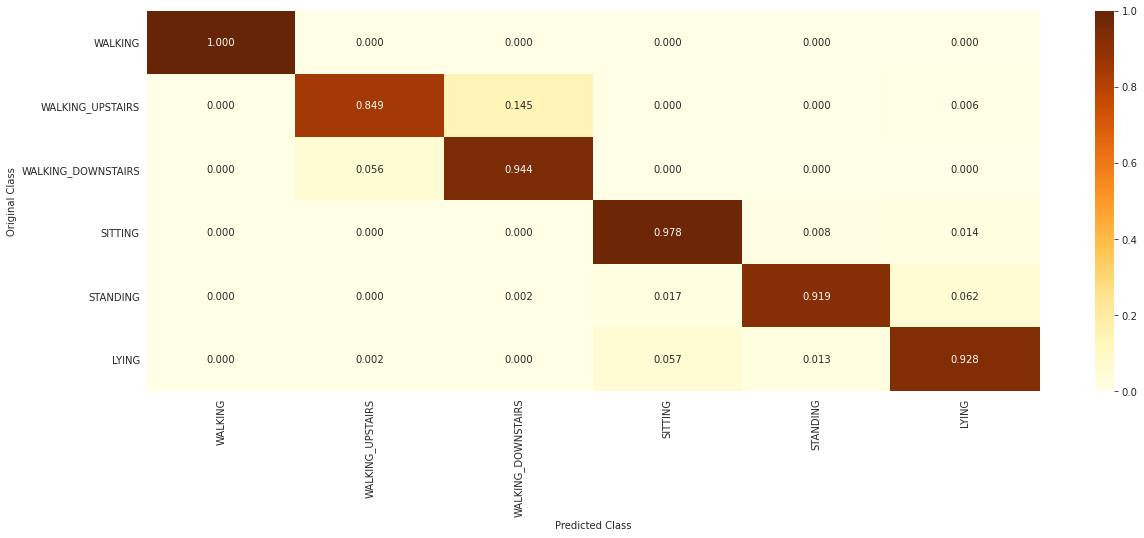

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid ={"n_estimators": [50, 100], "max_depth":[1, 3]}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid,verbose=10)
gbdt_grid_results = run_model(gbdt_grid, X_train, y_train, X_test, y_test,'GradientBoosted DecisionTrees')

## 2.7 Accuracy 

In [84]:
 df['Accuracy%'] = round(df['Accuracy%'],3)

Text(0, 0.5, 'Accuracy%')

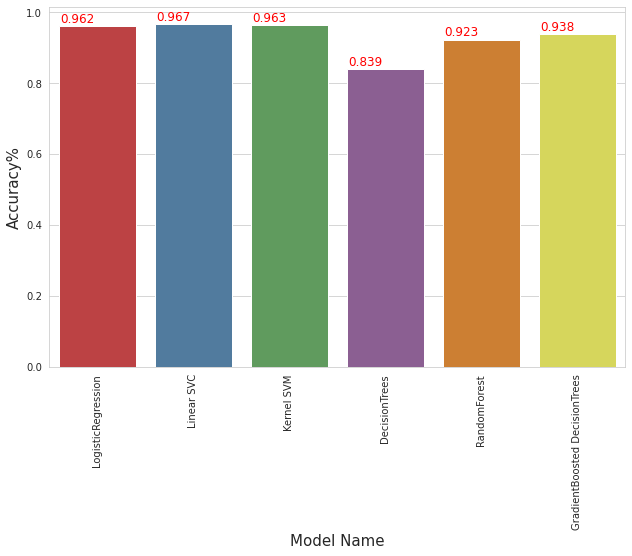

In [103]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Model_name',y='Accuracy%',data=df,capsize=0.1)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.01, y = i.get_height()+0.01, s = str(i.get_height()), fontsize = 12, color = "red")
plt.xticks(rotation=90)
plt.xlabel('Model Name',fontsize=15)
plt.ylabel('Accuracy%',fontsize=15)

* Observations :
  * We can observe that tree based models do not perform well in comparison to linear models
  * Linear SVC gives the highest performance 

## 3. Applying Deep Learning Models -LSTM(RNN)

In [1]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [2]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [3]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [4]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [5]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [6]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [10]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [11]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [12]:
# Import Keras
from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [13]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [14]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [15]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [16]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [17]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

In [18]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 29s 31ms/step - loss: 1.3606 - accuracy: 0.4296 - val_loss: 0.9645 - val_accuracy: 0.6244
Epoch 2/30
460/460 [==============================] - 14s 31ms/step - loss: 0.8550 - accuracy: 0.6386 - val_loss: 0.7700 - val_accuracy: 0.6916
Epoch 3/30
460/460 [==============================] - 17s 36ms/step - loss: 0.6994 - accuracy: 0.6924 - val_loss: 0.6732 - val_accuracy: 0.7414
Epoch 4/30
460/460 [==============================] - 19s 41ms/step - loss: 0.6143 - accuracy: 0.7539 - val_loss: 0.6026 - val_accuracy: 0.8107
Epoch 5/30
460/460 [==============================] - 17s 38ms/step - loss: 0.4222 - accuracy: 0.8637 - val_loss: 0.5768 - val_accuracy: 0.8188
Epoch 6/30
460/460 [==============================] - 16s 35ms/step - loss: 0.3275 - accuracy: 0.8998 - val_loss: 0.4691 - val_accuracy: 0.8507
Epoch 7/30
460/460 [==============================] - 16s 35ms/step - loss: 0.2680 - accuracy: 0.9156 - val_loss: 0.3787 - val_accuracy:

In [21]:
# Confusion Matrix
print(confusion_matrix_(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      388       101        2                   0   
STANDING                 0      102       427        1                   0   
WALKING                  0        5         1      449                  18   
WALKING_DOWNSTAIRS       0        0         0        0                 415   
WALKING_UPSTAIRS         0        1         2        1                  20   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           2  
WALKING                           23  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 447  


In [22]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 8ms/step - loss: 0.4121 - accuracy: 0.8945


In [23]:
score

[0.4121060073375702, 0.8944689631462097]

- With a simple 2 layer architecture we got 90.09% accuracy and a loss of 0.30
- We can further imporve the performace with Hyperparameter tuning

#### Assigment :
* try out with different lstm units
* try out with different drop out units
* add additional lstm layer and try increasing drop out units

Walkthrough :
* Experiment 1 :We will hyperparameter tune for multiple unit counts for lstm layer 1 .
* Experiment 2 :Choose the best parameters for layer1 lstm and layer 1 droput,by keeping this fixed tune for layer2 lstm and and layer2 dropout
* Experiment 3 : Train with more number of epochs for the best selected architecture from exp2
* Experiment 4 : Train with more number of epochs for the best selected architecture from exp1

In [18]:
def experiment1_architecture(layer1_units,dropout):
    # Initiliazing the sequential model
    model = Sequential()
    # Configuring the parameters
    model.add(LSTM(layer1_units, input_shape=(timesteps, input_dim)))
    # Adding a dropout layer
    model.add(Dropout(dropout))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()
    return model

def experiment2_architecture(layer1_units,dropout1,layer2_units,dropout2):
    # Initiliazing the sequential model
    model = Sequential()
    # Configuring the parameters
    model.add(LSTM(layer1_units, return_sequences = True,input_shape=(timesteps, input_dim)))
    # Adding a dropout layer
    model.add(Dropout(dropout1))
    model.add(LSTM(layer2_units))
    model.add(Dropout(dropout2))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()
    return model


In [19]:
def EXP1(layer1_units,dropouts,return_y=False):
    exp1_scores = []
    for u1 in layer1_units:
        for dropout in dropouts: 
            print('-'*100)
            print('Training Model with layer1 units:',u1,' Dropout:',dropout)
            print('-'*100)
            print('\n')
            model = experiment1_architecture(u1,dropout)
            ### compiling the model
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            # Training the model
            history = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)
            val_accuracy = np.amax(history.history['val_accuracy']) 
            accuracy = np.amax(history.history['accuracy']) 
            print('-'*100)
            print('Val Accuracy:',val_accuracy,' Train Accuracy:',accuracy)
            print('-'*100)
            print('\n')
            print('-'*100)
#             print('Confusion Matrix')
#             print('-'*100)
#             print('\n')
            # Confusion Matrix
            print(confusion_matrix_(Y_test, model.predict(X_test)))
            testscore = model.evaluate(X_test, Y_test)
            
            exp1_scores.append((u1,dropout,accuracy,val_accuracy,testscore))
    if return_y:
        return exp1_scores,Y_test,model.predict(X_test)
    else:  
        return exp1_scores

epochs=8
exp1_scores = EXP1([32,64],[0.25,0.5,0.75])

In [31]:
exp1_df = pd.DataFrame(columns = ['Layer1Units','Dropout','TrainAccuracy','ValAccuracy','Score'] ,
                       data = exp1_scores)

In [32]:
exp1_df

,Layer1Units,Dropout,TrainAccuracy,ValAccuracy,Score
0,32,0.25,0.937568,0.900577,"[0.3132242262363434, 0.9005768299102783]"
1,32,0.50,0.923830,0.883950,"[0.46504589915275574, 0.8724126219749451]"
2,32,0.75,0.844124,0.834069,"[0.6033707857131958, 0.8340685367584229]"
3,64,0.25,0.946953,0.901934,"[0.3227238655090332, 0.8998982310295105]"
4,64,0.50,0.940288,0.894808,"[0.40707921981811523, 0.894808292388916]"
5,64,0.75,0.923422,0.896166,"[0.3765288293361664, 0.8961656093597412]"


In [36]:
print('As we can see the best hyper parameter from the 6 combinations is :\n ',exp1_df.sort_values(by='Score').iloc[0])
print('\n')
print('score')

As we can see the best hyper parameter from the 6 combinations is :
  Layer1Units                                            32
Dropout                                              0.25
TrainAccuracy                                    0.937568
ValAccuracy                                      0.900577
Score            [0.3132242262363434, 0.9005768299102783]
Name: 0, dtype: object


#### Experiment 2 : LSTM layer2

* lets take our best layer1unit and best drop out rate from exp1

In [43]:
def EXP2(layer2_units,dropouts):
    exp2_scores = []
    for u1 in layer2_units:
        for dropout in dropouts: 
            print('-'*100)
            print('Training Model with layer1 units:',u1,' Dropout:',dropout)
            print('-'*100)
            print('\n')
            model = experiment2_architecture(32,0.25,u1,dropout)
            ### compiling the model
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            # Training the model
            history = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)
            val_accuracy = np.amax(history.history['val_accuracy']) 
            accuracy = np.amax(history.history['accuracy']) 
            print('-'*100)
            print('Val Accuracy:',val_accuracy,' Train Accuracy:',accuracy)
            print('-'*100)
            print('\n')
            print('-'*100)
#             print('Confusion Matrix')
#             print('-'*100)
#             print('\n')
            # Confusion Matrix
            print(confusion_matrix_(Y_test, model.predict(X_test)))
            testscore = model.evaluate(X_test, Y_test)
            
            exp2_scores.append((32,0.25,u1,dropout,accuracy,val_accuracy,testscore))
    return exp2_scores

epochs=8
exp2_scores = EXP2([16,32,64],[0.25,0.35,0.5])

----------------------------------------------------------------------------------------------------
Training Model with layer1 units: 16  Dropout: 0.25
----------------------------------------------------------------------------------------------------


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 102   

460/460 [==============================] - 38s 76ms/step - loss: 1.3923 - accuracy: 0.4201 - val_loss: 0.8757 - val_accuracy: 0.6447
Epoch 2/8
460/460 [==============================] - 38s 83ms/step - loss: 0.8346 - accuracy: 0.6605 - val_loss: 0.7184 - val_accuracy: 0.7055
Epoch 3/8
460/460 [==============================] - 34s 74ms/step - loss: 0.6716 - accuracy: 0.7234 - val_loss: 0.5599 - val_accuracy: 0.7896
Epoch 4/8
460/460 [==============================] - 37s 80ms/step - loss: 0.4771 - accuracy: 0.8314 - val_loss: 0.4962 - val_accuracy: 0.8541
Epoch 5/8
460/460 [==============================] - 37s 80ms/step - loss: 0.3613 - accuracy: 0.8934 - val_loss: 0.4473 - val_accuracy: 0.8554
Epoch 6/8
460/460 [==============================] - 34s 74ms/step - loss: 0.2986 - accuracy: 0.9134 - val_loss: 0.3756 - val_accuracy: 0.8873
Epoch 7/8
460/460 [==============================] - 34s 74ms/step - loss: 0.2681 - accuracy: 0.9180 - val_loss: 0.3890 - val_accuracy: 0.8941
Epoch 8/8

Epoch 5/8
460/460 [==============================] - 35s 76ms/step - loss: 0.1942 - accuracy: 0.9402 - val_loss: 0.3910 - val_accuracy: 0.8904
Epoch 6/8
460/460 [==============================] - 36s 79ms/step - loss: 0.1690 - accuracy: 0.9415 - val_loss: 0.7080 - val_accuracy: 0.8429
Epoch 7/8
460/460 [==============================] - 36s 79ms/step - loss: 0.1604 - accuracy: 0.9421 - val_loss: 0.4216 - val_accuracy: 0.9036
Epoch 8/8
460/460 [==============================] - 35s 75ms/step - loss: 0.1439 - accuracy: 0.9472 - val_loss: 0.5197 - val_accuracy: 0.8935
----------------------------------------------------------------------------------------------------
Val Accuracy: 0.903630793094635  Train Accuracy: 0.9451850056648254
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Pred                LAYING  SITTING  STANDING  WALKING 

----------------------------------------------------------------------------------------------------
Val Accuracy: 0.8870037198066711  Train Accuracy: 0.9466812014579773
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  4      378       104        0                   1   
STANDING                 0       85       444        0                   0   
WALKING                  0        0        36      384                  15   
WALKING_DOWNSTAIRS       0        0         0        6                 413   
WALKING_UPSTAIRS         0        1         0        1                   5   

P

93/93 [==============================] - 3s 27ms/step - loss: 0.4741 - accuracy: 0.8887


In [44]:
exp2_df = pd.DataFrame(columns = ['Layer1Units','Dropout1','Layer2Units','Dropout2','TrainAccuracy','ValAccuracy','Score'] ,
                       data = exp2_scores)

In [47]:
exp2_df.sort_values(by='Score')

,Layer1Units,Dropout1,Layer2Units,Dropout2,TrainAccuracy,ValAccuracy,Score
7,32,0.25,64,0.35,0.943553,0.897523,"[0.3512811064720154, 0.8975229263305664]"
1,32,0.25,16,0.35,0.941377,0.896844,"[0.35821279883384705, 0.8968442678451538]"
5,32,0.25,32,0.50,0.939472,0.914489,"[0.4029683470726013, 0.8859857320785522]"
6,32,0.25,64,0.25,0.946681,0.887004,"[0.4472033381462097, 0.8798778653144836]"
2,32,0.25,16,0.50,0.927095,0.894130,"[0.4542565941810608, 0.8771632313728333]"
8,32,0.25,64,0.50,0.942057,0.888700,"[0.474104106426239, 0.8887003660202026]"
4,32,0.25,32,0.35,0.945185,0.903631,"[0.5197166204452515, 0.8934509754180908]"
3,32,0.25,32,0.25,0.940832,0.902273,"[0.5865686535835266, 0.8489989638328552]"
0,32,0.25,16,0.25,0.940968,0.882932,"[1.0714815855026245, 0.8184594511985779]"


In [48]:
print('We can see that best model with one layer of LSTM gives 90% accuracy and with two layers it gives 89.75% of accuracy')
print()

We can see that best model with one layer of LSTM gives 90% accuracy and with two layers it gives 89.75% of accuracy


#### Experiment 3: train the best found model for more epochs with 2 lstm layers

In [51]:
epochs=30
exp3_scores = EXP2([64],[0.35])

----------------------------------------------------------------------------------------------------
Training Model with layer1 units: 64  Dropout: 0.35
----------------------------------------------------------------------------------------------------


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
dropout_35 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 390   

In [53]:
exp3_df = pd.DataFrame(columns = ['Layer1Units','Dropout1','Layer2Units','Dropout2','TrainAccuracy','ValAccuracy','Score'] ,
                       data = exp3_scores)

In [54]:
exp3_df

,Layer1Units,Dropout1,Layer2Units,Dropout2,TrainAccuracy,ValAccuracy,Score
0,32,0.25,64,0.35,0.957427,0.912114,"[0.7452968955039978, 0.8842890858650208]"


#### Experiment 4: train the best found model for more epochs with 2 lstm layers

In [20]:
epochs=50
exp4_scores,ytest,ypred = EXP1([32],[0.25],True)

----------------------------------------------------------------------------------------------------
Training Model with layer1 units: 32  Dropout: 0.25
----------------------------------------------------------------------------------------------------


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
460/460 [==============================] - 31s 34ms/step - loss: 1.3076 - accuracy: 0.4562 - val_loss: 0.8487 - val_a

460/460 [==============================] - 18s 40ms/step - loss: 0.1216 - accuracy: 0.9520 - val_loss: 0.5330 - val_accuracy: 0.8992
----------------------------------------------------------------------------------------------------
Val Accuracy: 0.9216151833534241  Train Accuracy: 0.957290530204773
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         5        0                   0   
SITTING                  0      369       121        0                   0   
STANDING                 0       72       460        0                   0   
WALKING                  0        0         6      466                   4   
WALKING_DOWNSTAIRS       0

In [21]:
exp4_df = pd.DataFrame(columns = ['Layer1Units','Dropout1','TrainAccuracy','ValAccuracy','Score'] ,
                       data = exp4_scores)

In [22]:
exp4_df

,Layer1Units,Dropout1,TrainAccuracy,ValAccuracy,Score
0,32,0.25,0.957291,0.921615,"[0.5329602956771851, 0.8992195725440979]"


#### Observations :
1. Conducted Hyperparameter tuning in 4 parts.
2. found that the DL architecture with one layer of lstm (32units) and dropout 0.25 gives the highest accracy.
3. increased epochs for the best architecture, still maximum accuracy attained was 90%.


-------------------- Confusion matrix --------------------


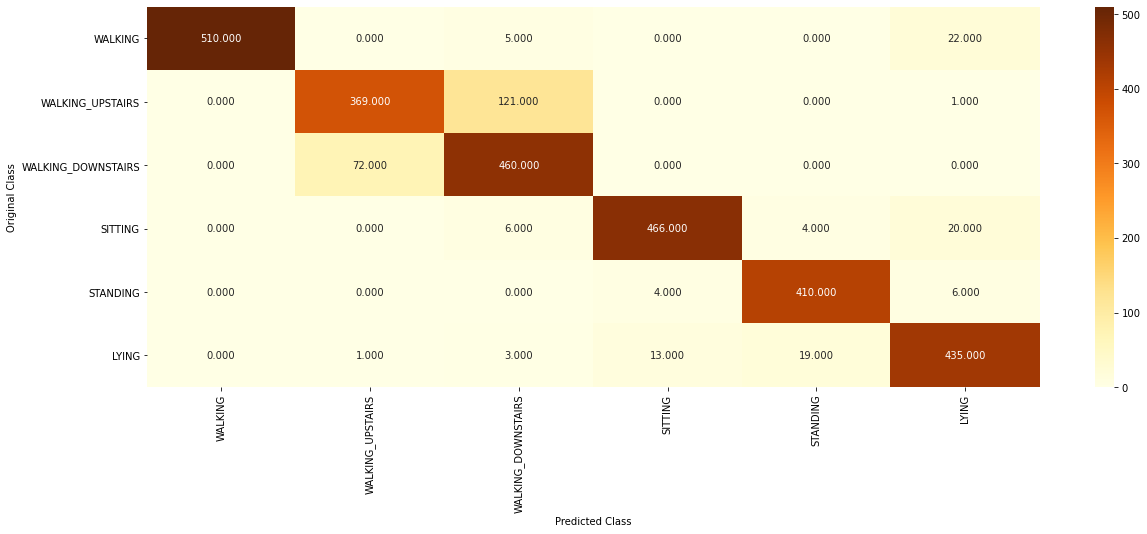

-------------------- Precision matrix (Columm Sum=1) --------------------


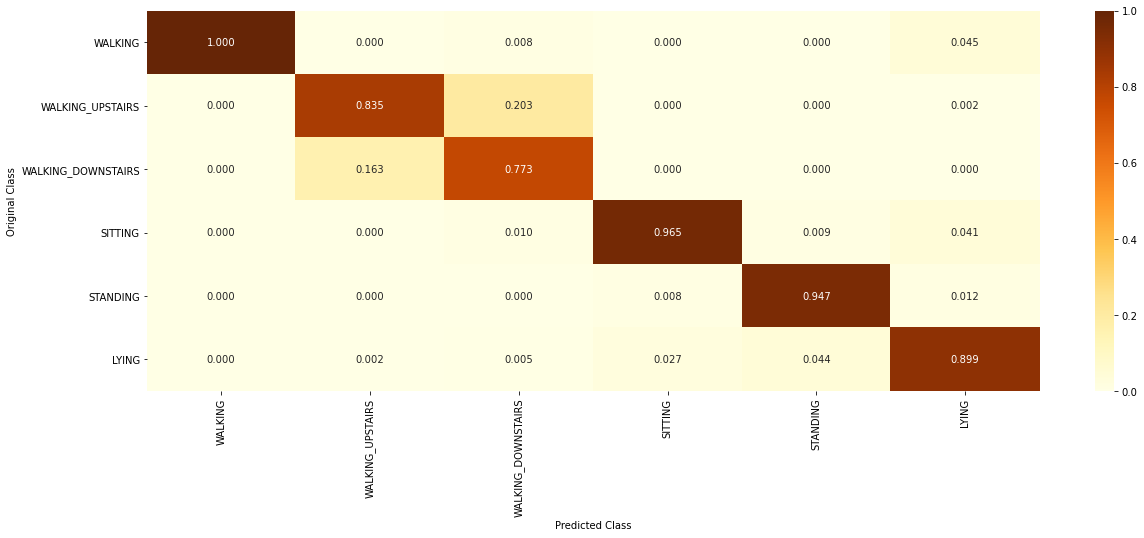

-------------------- Recall matrix (Row sum=1) --------------------


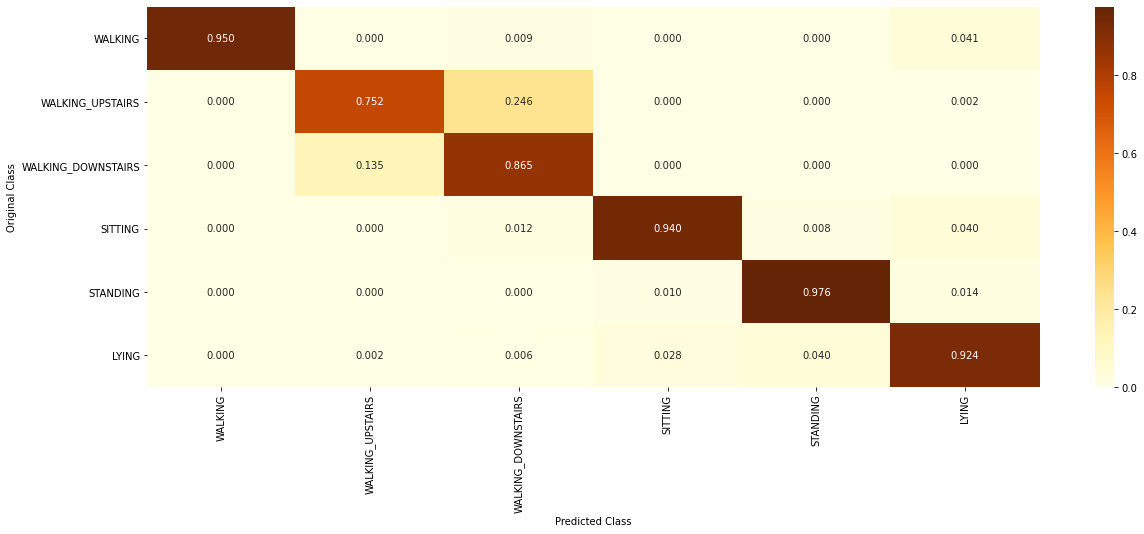

In [28]:
plot_confusion_matrix(ytest,ypred)

##### Model built without expert crafted  fetures performs fairly well with 90% accuracy with layer 1 . Model able to provide good precisiona nd recall for standing,sitting,lying,walking.